<a href="https://colab.research.google.com/github/KAMBLE/Tensorflow/blob/main/2_NN_Classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Classification using Tensorflow** 

* Binary Classification
* Multiclass Classification
* Multilable Classification

In [ ]:
import tensorflow as tf
tf.__version__

'2.4.1'

### Creatng data to view and fit 

In [ ]:
import sklearn
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [ ]:
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

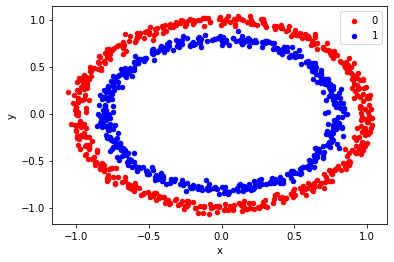

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

###Steps in modeling 

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
                               ])
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5157


In [ ]:
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
                               ])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X,y,epochs=100,verbose=0)
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(100),
                               ])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(X,y,epochs=100,verbose=0)
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.0000e+00


[0.6931697130203247, 0.0]

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
Total params: 20,500
Trainable params: 20,500
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy as np

def plot_decision_boundary(model,X,y):

  #define the axis boundaries of the plot and create a meshgrid
  x_min,x_max = X[:,0].min() - 0.1,X[:,0].max() + 0.1
  y_min,y_max = X[:,1].min() - 0.1,X[:,1].max() + 0.1

  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
  
  #Creat X values 
  x_in = np.c_[xx.ravel(),yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classsification") 
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    y_pred = np.round(y_pred).reshape(xx.shape)

#cmap=plt.RdY1Bu,
#cmap=plt.RdY1Bu
  plt.contourf(xx,yy,y_pred,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

doing multiclass classsification


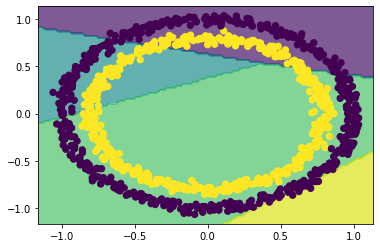

In [ ]:
plot_decision_boundary(model_3,X,y)

###Non Liniarity

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7724 - accuracy: 0.4447
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9616 - accuracy: 0.4212
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6369 - accuracy: 0.4227
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9298 - accuracy: 0.3950
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5803 - accuracy: 0.4409
Epoch 11/

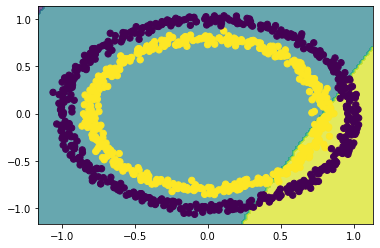

In [ ]:
plot_decision_boundary(model_4,X,y)

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
                               ])
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7724 - accuracy: 0.4447
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9616 - accuracy: 0.4212
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6369 - accuracy: 0.4227
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9298 - accuracy: 0.3950
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5803 - accuracy: 0.4409
Epoch 11/

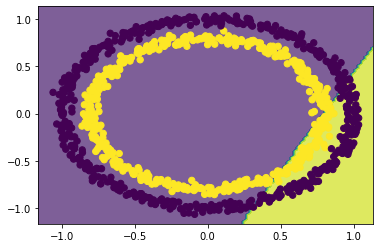

In [ ]:
plot_decision_boundary(model_5,X,y)

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
                      tf.keras.layers.Dense(100,activation=tf.keras.activations.relu),
                      tf.keras.layers.Dense(100,activation=tf.keras.activations.relu),
                      tf.keras.layers.Dense(1,activation="sigmoid")
                               ])
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])
history = model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5053
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.4892
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.4931
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.5691
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.6218
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.8007
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.9063
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.9658
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4022 - accuracy: 0.9813
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3064 - accuracy: 0.9978
Epoch 11/

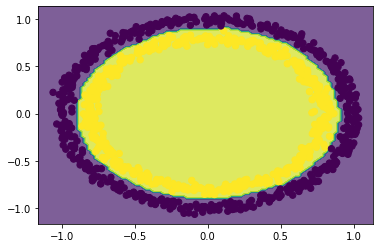

In [ ]:
plot_decision_boundary(model_6,X,y)

In [ ]:
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

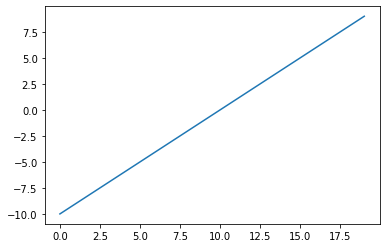

In [ ]:
#visualize our toy tensor 
plt.plot(A)

In [ ]:
#sigmoid function

def sigmoid(x):
  return 1/(1+tf.exp(-x))

#use sigmoid on toy tensor 

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

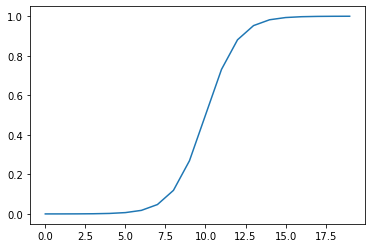

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
def relu(x):
  return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [ ]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

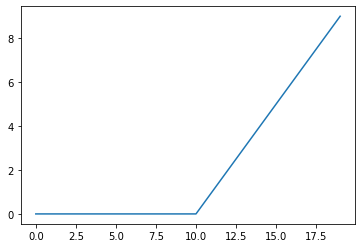

In [ ]:
plt.plot(relu(A))

In [ ]:
len(X)

1000

In [ ]:
X_train,y_train = X[:800],y[:800]
X_test,y_test = X[:800],y[:800]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (800, 2), (800,), (800,))

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
                      tf.keras.layers.Dense(100,activation=tf.keras.activations.relu),
                      tf.keras.layers.Dense(100,activation=tf.keras.activations.relu),
                      tf.keras.layers.Dense(1,activation="sigmoid")
                               ])
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])
history = model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6906 - accuracy: 0.5481
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5832 - accuracy: 0.7886
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2832 - accuracy: 0.9118
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1289 - accuracy: 0.9631
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0550 - accuracy: 0.9869
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 1.0000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9955
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 0.9972
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9931
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 0.9937
Epoch 11/

In [ ]:
model_7.evaluate(X_test,y_est)

NameError: ignored